In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X_binary, y_binary = make_blobs(
    n_samples=500,
    centers=2,
    n_features=2,
    random_state=100,
    cluster_std=1.5,
    center_box=(-10.0, 10.0),
    shuffle=True
)

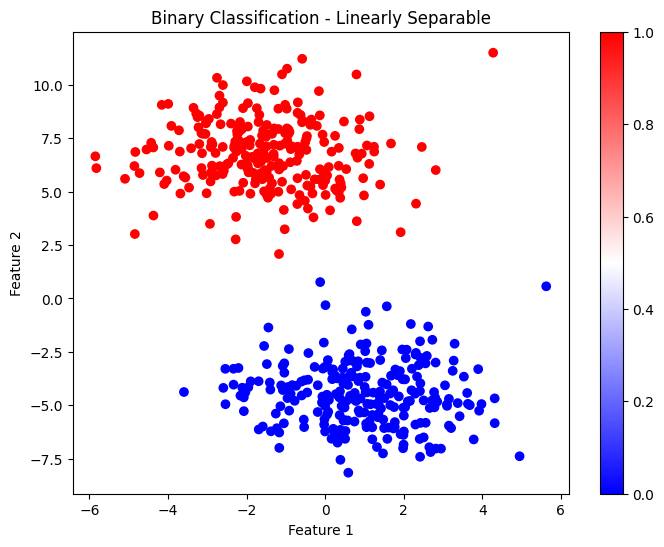

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X_binary[:, 0], X_binary[:, 1], c=y_binary, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification - Linearly Separable')
plt.colorbar()
plt.show()

In [4]:
y_binary_ohe = pd.get_dummies(y_binary).to_numpy()

In [6]:
y_binary_ohe.shape

(500, 2)

In [5]:
%run C:\Users\rachi\DL\ANN\nnfs.ipynb

In [6]:
model1 = NN_classifier(layers=[2,2],activation='sigmoid',out='softmax',loss_function='cce')

Epoch:0 Loss: 2.8027797712497473
---------------------
Epoch:10 Loss: 0.010301423897285176
---------------------
Epoch:20 Loss: 0.010202507021845839
---------------------
Epoch:30 Loss: 0.010104559831047836
---------------------
Epoch:40 Loss: 0.01000755093814549
---------------------
Epoch:50 Loss: 0.009911450912213052
---------------------
Epoch:60 Loss: 0.009816232108778201
---------------------
Epoch:70 Loss: 0.009721868521150858
---------------------
Epoch:80 Loss: 0.009628335649426672
---------------------
Epoch:90 Loss: 0.009535610384645083
---------------------


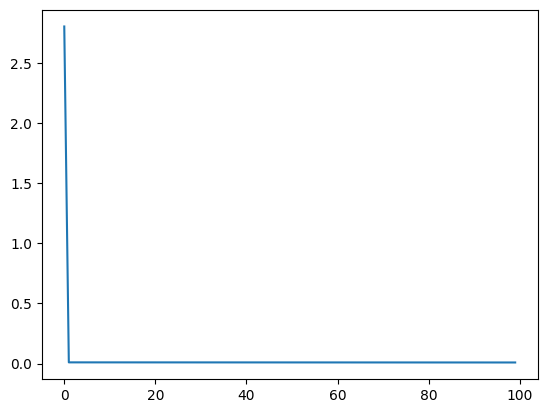

In [7]:
model1.fit(X=X_binary,y=y_binary_ohe,lr=0.001,epochs=100)

plt.plot(range(100),model1.losses)

In [8]:
ypred1 = model1.predict(X_binary)

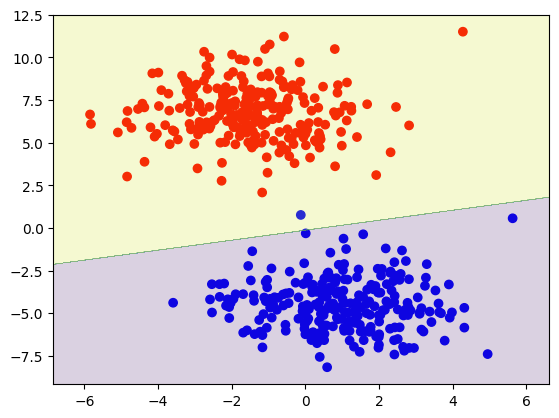

In [9]:
a=np.arange(start=X_binary[:,0].min()-1, stop=X_binary[:,0].max()+1, step=0.01)
b=np.arange(start=X_binary[:,1].min()-1, stop=X_binary[:,1].max()+1, step=0.01)

xx,yy = np.meshgrid(a,b)

input_range = np.array([xx.ravel(),yy.ravel()]).T

# input_range_poly = poly.fit_transform(input_range)

range_pred = model1.predict(input_range)

plt.scatter(X_binary[:, 0], X_binary[:, 1], c=y_binary, cmap='bwr')
plt.contourf(xx, yy, range_pred.reshape(xx.shape), alpha=0.2)

In [10]:
from sklearn.metrics import confusion_matrix,classification_report

In [11]:
print(confusion_matrix(y_binary,ypred1))

[[249   1]
 [  0 250]]


In [12]:
print(classification_report(y_binary,ypred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [25]:
X_multiclass, y_multiclass = make_blobs(
    n_samples=500,
    centers=4,
    n_features=2,
    random_state=10,
    cluster_std=1.5,
    center_box=(-10.0, 10.0),
    shuffle=True
)

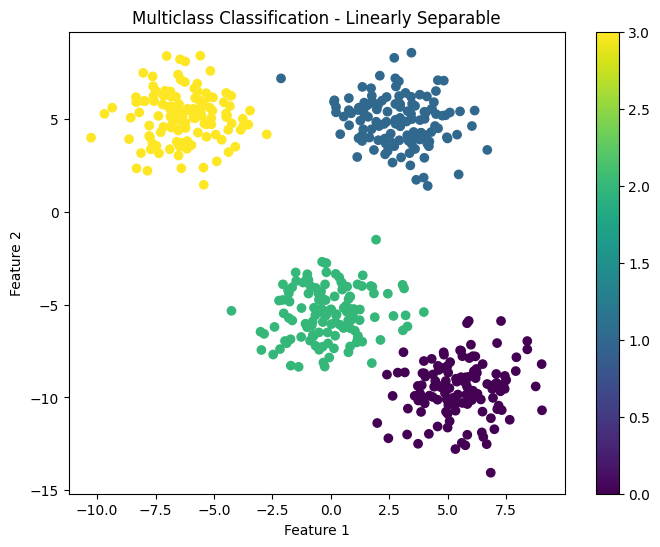

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(X_multiclass[:, 0], X_multiclass[:, 1], c=y_multiclass, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Multiclass Classification - Linearly Separable')
plt.colorbar()
plt.show()

In [27]:
y_multiclass_ohe = pd.get_dummies(y_multiclass).to_numpy()

In [60]:
model2 = NN_classifier(layers=[2,4,4],activation='relu',out='softmax',loss_function='cce')

Epoch:0 Loss: 5.604137195659066
---------------------
Epoch:10 Loss: 0.20602278502807764
---------------------
Epoch:20 Loss: 0.13154796534371616
---------------------
Epoch:30 Loss: 0.09947096400609812
---------------------
Epoch:40 Loss: 0.08162965331264914
---------------------
Epoch:50 Loss: 0.07029137609181428
---------------------
Epoch:60 Loss: 0.062102185481282275
---------------------
Epoch:70 Loss: 0.055880994030333066
---------------------
Epoch:80 Loss: 0.05099582942749341
---------------------
Epoch:90 Loss: 0.04704618733115915
---------------------
Epoch:100 Loss: 0.04377694678849166
---------------------
Epoch:110 Loss: 0.04099756999243319
---------------------
Epoch:120 Loss: 0.038580943495807304
---------------------
Epoch:130 Loss: 0.03645214359279416
---------------------
Epoch:140 Loss: 0.03456128200627791
---------------------
Epoch:150 Loss: 0.03286126284241964
---------------------
Epoch:160 Loss: 0.03132280212461605
---------------------
Epoch:170 Loss: 0.029920

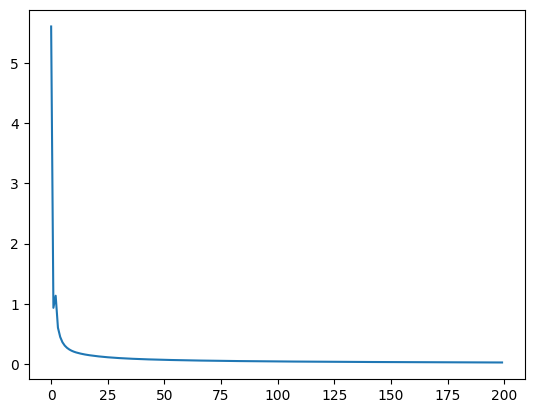

In [61]:
model2.fit(X=X_multiclass,y=y_multiclass_ohe,lr=0.001,epochs=200)

plt.plot(range(200),model2.losses)

In [62]:
ypred2 = model2.predict(X_multiclass)

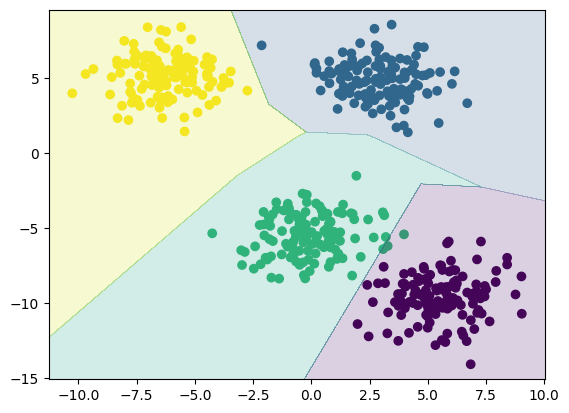

In [63]:
a=np.arange(start=X_multiclass[:,0].min()-1, stop=X_multiclass[:,0].max()+1, step=0.01)
b=np.arange(start=X_multiclass[:,1].min()-1, stop=X_multiclass[:,1].max()+1, step=0.01)

xx,yy = np.meshgrid(a,b)

input_range = np.array([xx.ravel(),yy.ravel()]).T

# input_range_poly = poly.fit_transform(input_range)

range_pred = model2.predict(input_range)

plt.scatter(X_multiclass[:, 0], X_multiclass[:, 1], c=y_multiclass, cmap='viridis')
plt.contourf(xx, yy, range_pred.reshape(xx.shape), alpha=0.2)

In [64]:
print(confusion_matrix(y_multiclass,ypred2))

[[125   0   0   0]
 [  0 125   0   0]
 [  3   0 122   0]
 [  0   0   0 125]]


In [65]:
print(classification_report(y_multiclass,ypred2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       125
           1       1.00      1.00      1.00       125
           2       1.00      0.98      0.99       125
           3       1.00      1.00      1.00       125

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



In [66]:
from sklearn.datasets import make_moons, make_circles
X_moons, y_moons = make_moons(
    n_samples=100,
    noise=0.1,
    random_state=42
)

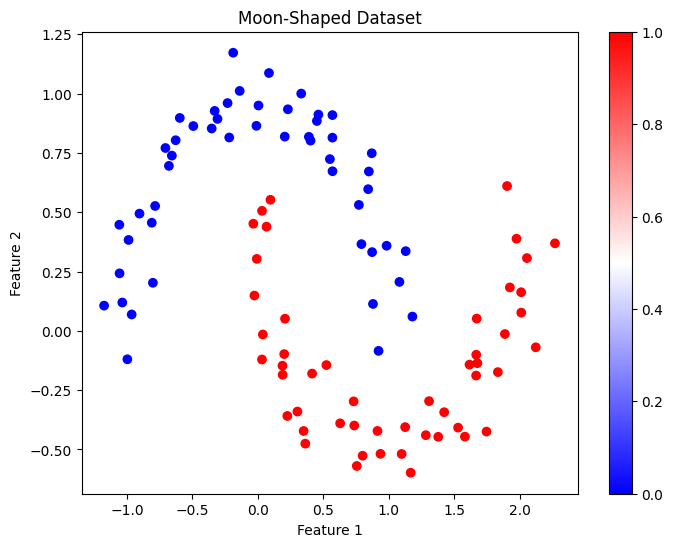

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moon-Shaped Dataset')
plt.colorbar()
plt.show()

In [68]:
y_moons_ohe = pd.get_dummies(y_moons).to_numpy()

In [89]:
model3 = NN_classifier(layers=[2,8,4,2],activation='tanh',out='softmax',loss_function='cce')

Epoch:0 Loss: 3.048340381227942
---------------------
Epoch:10 Loss: 0.5149598786479861
---------------------
Epoch:20 Loss: 0.3685561609682804
---------------------
Epoch:30 Loss: 0.30511774482236476
---------------------
Epoch:40 Loss: 0.2703830898869665
---------------------
Epoch:50 Loss: 0.24914868370705284
---------------------
Epoch:60 Loss: 0.23375906317292183
---------------------
Epoch:70 Loss: 0.22090097825210533
---------------------
Epoch:80 Loss: 0.20917679080422652
---------------------
Epoch:90 Loss: 0.1979717420300859
---------------------
Epoch:100 Loss: 0.18702581954935318
---------------------
Epoch:110 Loss: 0.17625566850515959
---------------------
Epoch:120 Loss: 0.16567325996715027
---------------------
Epoch:130 Loss: 0.15534375989542154
---------------------
Epoch:140 Loss: 0.14535771477195567
---------------------
Epoch:150 Loss: 0.13580885929247757
---------------------
Epoch:160 Loss: 0.12677704443212343
---------------------
Epoch:170 Loss: 0.1183179767273

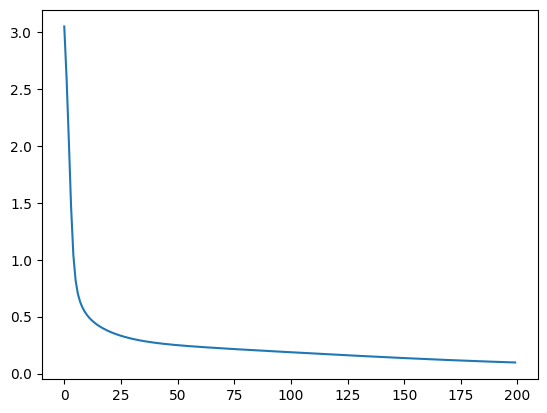

In [90]:
model3.fit(X=X_moons,y=y_moons_ohe,lr=0.001,epochs=200)

plt.plot(range(200),model3.losses)

In [91]:
ypred3 = model3.predict(X_moons)

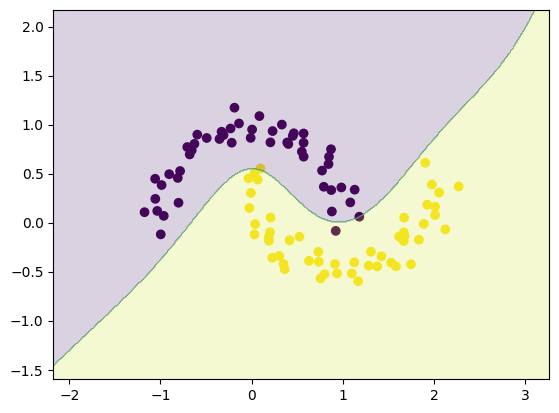

In [92]:
a=np.arange(start=X_moons[:,0].min()-1, stop=X_moons[:,0].max()+1, step=0.01)
b=np.arange(start=X_moons[:,1].min()-1, stop=X_moons[:,1].max()+1, step=0.01)

xx,yy = np.meshgrid(a,b)

input_range = np.array([xx.ravel(),yy.ravel()]).T

# input_range_poly = poly.fit_transform(input_range)

range_pred = model3.predict(input_range)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons,)
plt.contourf(xx, yy, range_pred.reshape(xx.shape), alpha=0.2)

In [93]:
print(confusion_matrix(y_moons,ypred3))

[[48  2]
 [ 1 49]]


In [94]:
print(classification_report(y_moons,ypred3))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.96      0.98      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

